In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [86]:
zip_df = pd.read_csv('./flaskProject/static/scores_combined.csv')
red_df = pd.read_csv('./flaskProject/static/redfin_merged_data.csv')
zip_df=zip_df.rename(columns={'FIPS':'fips'})
factors=zip_df.join(red_df, on='fips',lsuffix='',rsuffix='_right')
zip_df.dtypes
#red_df.dtypes

Unnamed: 0                                             int64
fips                                                   int64
County                                                object
State                                                 object
HWBI_Score                                           float64
C2N_Bio_Score                                        float64
CF_AP_Score                                          float64
Economic_Capital_Investment_Score                    float64
Economic_Consumption_Score                           float64
Economic_Employment_Score                            float64
Economic_Finance_Score                               float64
Economic_Innovation_Score                            float64
Economic_Production_Score                            float64
Economic_Re_Distribution_Score                       float64
Ecosystem_Air_Quality_Score                          float64
Ecosystem_Food__Fiber_and_Fuel_Provisioning_Score    float64
Ecosystem_Greenspace_Sco

In [87]:

# save file score_combined.csv from teams to local machine and add path
zip_df = pd.read_csv('./flaskProject/static/scores_combined.csv')
red_df = pd.read_csv('./flaskProject/static/scores_combined.csv')
print(zip_df.columns)

Index(['Unnamed: 0', 'FIPS', 'County', 'State', 'HWBI_Score', 'C2N_Bio_Score',
       'CF_AP_Score', 'Economic_Capital_Investment_Score',
       'Economic_Consumption_Score', 'Economic_Employment_Score',
       'Economic_Finance_Score', 'Economic_Innovation_Score',
       'Economic_Production_Score', 'Economic_Re_Distribution_Score',
       'Ecosystem_Air_Quality_Score',
       'Ecosystem_Food__Fiber_and_Fuel_Provisioning_Score',
       'Ecosystem_Greenspace_Score', 'Ecosystem_Water_Quality_Score',
       'Ecosystem_Water_Quantity_Score', 'EDU_BE_Score', 'EDU_PA_Score',
       'EDU_SED_Score', 'HEA_HC_Score', 'HEA_LEM_Score', 'HEA_LB_Score',
       'HEA_PWB_Score', 'HEA_PMHC_Score', 'Domain_Score_x', 'LTM_AP_Score',
       'LTM_TS_Score', 'LTM_WAA_Score', 'LST_BN_Score', 'LST_INC_Score',
       'LST_WEA_Score', 'LST_WRK_Score', 'SAS_ACTS_Score', 'SAS_PERS_Score',
       'SAS_RISK_Score', 'Domain_Score_y', 'SC_ATC_Score', 'SC_DME_Score',
       'SC_FAM_Score', 'SC_SENG_Score', 'SC_SSUP_

In [88]:
factors_df=zip_df[['C2N_Bio_Score',
       'CF_AP_Score', 'Economic_Capital_Investment_Score',
       'Economic_Consumption_Score', 'Economic_Employment_Score',
       'Economic_Finance_Score', 'Economic_Innovation_Score',
       'Economic_Production_Score', 'Economic_Re_Distribution_Score',
       'Ecosystem_Air_Quality_Score',
       'Ecosystem_Food__Fiber_and_Fuel_Provisioning_Score',
       'Ecosystem_Greenspace_Score', 'Ecosystem_Water_Quality_Score',
       'Ecosystem_Water_Quantity_Score', 'EDU_BE_Score', 'EDU_PA_Score',
       'EDU_SED_Score', 'HEA_HC_Score', 'HEA_LEM_Score', 'HEA_LB_Score',
       'HEA_PWB_Score', 'HEA_PMHC_Score', 'Domain_Score_x', 'LTM_AP_Score',
       'LTM_TS_Score', 'LTM_WAA_Score', 'LST_BN_Score', 'LST_INC_Score',
       'LST_WEA_Score', 'LST_WRK_Score', 'SAS_ACTS_Score', 'SAS_PERS_Score',
       'SAS_RISK_Score', 'Domain_Score_y', 'SC_ATC_Score', 'SC_DME_Score',
       'SC_FAM_Score', 'SC_SENG_Score', 'SC_SSUP_Score']]
print(factors_df)

      C2N_Bio_Score  CF_AP_Score  Economic_Capital_Investment_Score  \
0         34.720764    69.829790                          59.199260   
1         84.781353    34.335369                          57.939995   
2         57.364983    45.138996                          59.207243   
3         20.823386    68.858149                          59.456203   
4         10.000000    60.489579                          58.507754   
...             ...          ...                                ...   
3137      90.000000    37.004510                          58.440963   
3138      27.772075    67.782302                          59.164270   
3139      57.364983    37.478640                          58.244304   
3140      20.823386    61.585942                          59.047781   
3141      57.364983    44.233455                          59.216921   

      Economic_Consumption_Score  Economic_Employment_Score  \
0                      52.805008                  64.801077   
1                    

In [89]:
economic=['Economic_Capital_Investment_Score',
       'Economic_Consumption_Score', 'Economic_Employment_Score',
       'Economic_Finance_Score', 'Economic_Innovation_Score',
       'Economic_Production_Score', 'Economic_Re_Distribution_Score']
ecosystem=['Ecosystem_Air_Quality_Score',
       'Ecosystem_Food__Fiber_and_Fuel_Provisioning_Score',
       'Ecosystem_Greenspace_Score', 'Ecosystem_Water_Quality_Score',
       'Ecosystem_Water_Quantity_Score']
education=['EDU_BE_Score', 'EDU_PA_Score',
       'EDU_SED_Score']
health=['HEA_HC_Score', 'HEA_LEM_Score', 'HEA_LB_Score',
       'HEA_PWB_Score', 'HEA_PMHC_Score']
#leisure_time=['LTM_AP_Score',
       #'LTM_TS_Score', 'LTM_WAA_Score']
living_standards=['LST_BN_Score', 'LST_INC_Score',
       'LST_WEA_Score', 'LST_WRK_Score']
safety=['SAS_ACTS_Score', 'SAS_PERS_Score',
       'SAS_RISK_Score']
#social_cohesion=['SC_ATC_Score', 'SC_DME_Score',
       #'SC_FAM_Score', 'SC_SENG_Score', 'SC_SSUP_Score']
nature=['C2N_Bio_Score',
       'CF_AP_Score']

In [90]:
factor_cons_df=pd.DataFrame()
factor_cons_df['economic_factors']=factors_df[economic].mean(axis=1)
factor_cons_df['ecosystem_factors']=factors_df[ecosystem].mean(axis=1)
factor_cons_df['education_factors']=factors_df[education].mean(axis=1)
factor_cons_df['health_factors']=factors_df[health].mean(axis=1)
factor_cons_df['living_standards_factors']=factors_df[living_standards].mean(axis=1)
factor_cons_df['safety_factors']=factors_df[safety].mean(axis=1)
factor_cons_df['nature_factors']=factors_df[nature].mean(axis=1)
print(factor_cons_df)

      economic_factors  ecosystem_factors  education_factors  health_factors  \
0            53.183899          56.705207          57.570552       61.546898   
1            49.762557          57.056901          55.837728       60.756384   
2            48.581217          44.821291          38.676783       59.180942   
3            52.826921          58.618382          64.412796       60.421936   
4            52.118042          60.359334          68.259172       56.008795   
...                ...                ...                ...             ...   
3137         50.182530          58.274115          35.645556       52.433628   
3138         53.807733          60.759004          63.679422       63.305095   
3139         51.189965          50.645817          36.881601       57.017909   
3140         50.521307          56.670083          57.174736       54.226828   
3141         50.301362          55.041733          45.050164       53.259282   

      living_standards_factors  safety_

In [91]:
corr_df=factor_cons_df.corr()
print(corr_df)

                          economic_factors  ecosystem_factors  \
economic_factors                  1.000000          -0.003038   
ecosystem_factors                -0.003038           1.000000   
education_factors                 0.317588           0.059328   
health_factors                    0.294609          -0.101074   
living_standards_factors          0.355710          -0.140724   
safety_factors                    0.281409          -0.052936   
nature_factors                   -0.223059           0.066007   

                          education_factors  health_factors  \
economic_factors                   0.317588        0.294609   
ecosystem_factors                  0.059328       -0.101074   
education_factors                  1.000000        0.247926   
health_factors                     0.247926        1.000000   
living_standards_factors           0.714209        0.396376   
safety_factors                     0.420461        0.436105   
nature_factors                    -0.6

In [92]:
X=factor_cons_df.to_numpy()

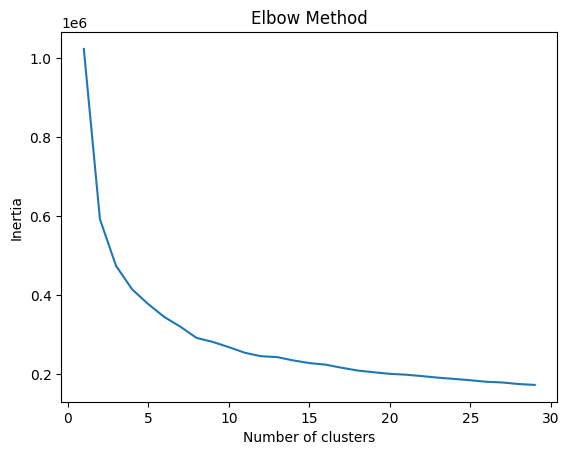

In [93]:
inertia=[]
for k in range(1,30):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 30), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [94]:
kmeans_final=KMeans(n_clusters=10,random_state=0)
kmeans_final.fit(X)
labels=kmeans_final.labels_
centroids=kmeans.cluster_centers_
print("Labels: ",labels)
print("Centorids: ",centroids)

Labels:  [6 6 0 ... 5 8 7]
Centorids:  [[50.05012587 54.68943096 38.4790469  55.70613647 46.8253413  44.5215861
  50.31751961]
 [51.74771624 58.1419231  64.73740992 60.74109391 54.60327557 62.46440665
  48.07240714]
 [51.61789203 58.4761837  37.84455125 60.42077573 49.1029534  66.85205195
  61.79901615]
 [50.35410451 39.41593602 56.09827456 59.76706536 53.07252828 62.6504404
  51.23466446]
 [49.62753055 58.18537075 42.57072619 58.5873392  50.24006929 58.61718471
  64.80243884]
 [50.30317776 53.28159255 48.27937296 56.54842208 50.81328808 53.07330649
  50.05781145]
 [48.87919749 58.98638823 37.26235598 56.16149436 46.1744543  53.41045014
  59.62282085]
 [49.93438569 58.05168068 58.9335778  56.34461865 52.41015041 57.65534121
  47.88207588]
 [50.75577944 57.9848674  57.66911828 59.50812984 53.84261574 64.58898942
  45.15716944]
 [51.04141887 58.30198236 64.49667744 55.63966809 53.72502457 62.71726663
  41.373568  ]
 [51.18286583 57.48159199 56.210114   58.27274292 50.13828775 64.74358151

In [95]:
factor_cons_df["Cluster"]=kmeans_final.labels_
factor_cons_df['FIPS']=zip_df['FIPS']
factor_cons_df['County']=zip_df['County']
factor_cons_df['State']=zip_df['State']
factor_cons_df.to_csv("cluster_data.csv")

In [105]:
print(type(kmeans_final.labels_[0]))

<class 'numpy.int32'>


In [98]:
economic_mean=factor_cons_df['economic_factors'].mean()
ecosystem_mean=factor_cons_df['ecosystem_factors'].mean()
education_mean=factor_cons_df['education_factors'].mean()
health_mean=factor_cons_df['health_factors'].mean()
living_standard_mean=factor_cons_df['living_standards_factors'].mean()
safety_mean=factor_cons_df['safety_factors'].mean()
nature_mean=factor_cons_df['nature_factors'].mean()


percentile_dict = {"1":0.6,"2":0.8,"3":1.0,"4":1.2,"5":1.4}

econ_value=1.0*economic_mean
eco_value=1.2*ecosystem_mean
edu_value=0.8*education_mean
hea_value=1.4*health_mean
liv_value=0.6*living_standard_mean
safe_value=1.0*safety_mean
nat_value=1.2*nature_mean

In [107]:
pred_array=np.array([econ_value,eco_value,edu_value,hea_value,liv_value,safe_value,nat_value]).reshape(1,-1)
pred=kmeans_final.predict(pred_array)
c=(pred[0])


In [108]:
factor_cons_df[factor_cons_df['Cluster']==c]

,economic_factors,ecosystem_factors,education_factors,health_factors,living_standards_factors,safety_factors,nature_factors,Cluster,FIPS,County,State
8,53.559857,61.330020,36.464303,61.030644,48.856973,58.616917,60.842145,3,20167,Russell,Kansas
12,48.047249,59.572894,35.432540,60.497191,47.391615,64.406021,64.523566,3,5023,Cleburne,Arkansas
33,50.891990,55.357455,42.796755,60.506027,50.364853,56.773477,67.104458,3,20009,Barton,Kansas
35,48.511532,56.580936,35.321331,59.566664,45.200652,57.741828,67.290376,3,22083,Richland,Louisiana
39,46.278135,58.553737,30.680940,56.424149,48.539834,60.076477,64.108606,3,1133,Winston,Alabama
...,...,...,...,...,...,...,...,...,...,...,...
3097,49.183362,54.713081,35.355523,56.809679,46.413108,56.097092,65.986271,3,45025,Chesterfield,South Carolina
3119,48.385216,59.997231,36.731041,52.495115,46.604740,65.017515,57.219066,3,21115,Johnson,Kentucky
3130,47.915424,58.811641,35.324248,55.098445,46.049277,58.964265,65.408716,3,5057,Hempstead,Arkansas
3132,51.131184,65.703660,42.795718,60.061879,51.347429,58.453665,62.358428,3,51117,Mecklenburg,Virginia
